# Curious Case of Economic Growth in Asia

A research project at NYU's Stern School of Business.

Written by Hanjo Kim (hjk490@nyu.edu), Simon (Seon Mok) Lee (sml523@nyu.edu) under the direction of David Backus, May 2016.

## Abstract

During the later half of 20th century, some countries in Asia saw tremendous growth but some did not. Especially, South Korea was one of the poorest countries in the world by 1960 but its economy grew rapidly and became the 10th biggest economy in the world. Its fast development has been often attributed to the strong exports growth over the last few decades. Under this light, We explore the reasons for such divergence in their economic development by examining their exports data.

## Developed vs. Developing Countries in Asia

We first picked 3 developed countries--Japan, Singapore, and South Korea and 3 developing countries--Thailand, Phillines, and Vietnam.

We begin by examining how the overall economies of the countries have been developing by looking at the data for GDP per Capital adjusted for Purchasing Power Parity. 

Group 1 consists of developed countries--Japan, Korea, and Singapore.

Group 2 consists of developing countries--Thailand, Philippines, and Vietnam. 

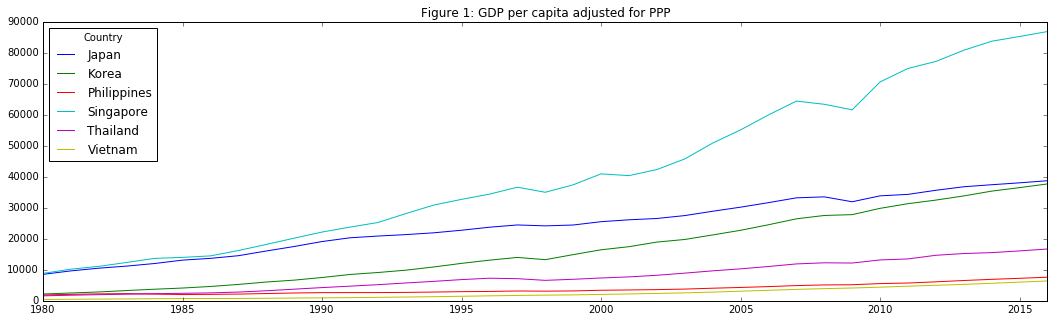

In [19]:
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import numpy as np                     # foundation for Pandas 
%matplotlib inline

'''
We downloaded the data from our sources (specific in the bottom) and uploaded them to our github accounts,
so that anyone can run the code and get the same results without having to download it and set the directory.
'''


url3='https://raw.githubusercontent.com/hjkim1304/databootcampdata/master/weoppp.csv'
df_gdp_usd=pd.read_csv(url3)
fig,ax=plt.subplots(figsize=(18,5))
new_df_gdp_usd=df_gdp_usd.head(n=6).drop(['Units','Scale','Estimates Start After'],axis=1).set_index('Country').T
#new_df_gdp_usd['Japan']=new_df_gdp_usd['Japan'].str.replace(',','').astype(float)
#new_df_gdp_usd['Korea']=new_df_gdp_usd['Korea'].str.replace(',','').astype(float)
#new_df_gdp_usd['Philippines']=new_df_gdp_usd['Philippines'].astype(float)
for i in (new_df_gdp_usd.columns):
    new_df_gdp_usd[i]=new_df_gdp_usd[i].str.replace(',','').astype(float)
new_df_gdp_usd.plot(ax=ax)
ax.set_title('Figure 1: GDP per capita adjusted for PPP')

In Figure 1, we have plotted Gross Domestic Product (GDP) per capita adjusted for Purchasing Power Parity (PPP). We see from here that there is a clear difference between the top 3 countries (Singapore, Japan, Korea) and bottom 3 countries (Thailand, Vietnam, Philippines). Particularly, Korea began as a member of the Group 2 but gradually merged into Group 1. We will now look at the data for the percent change of exports for each country since 1980.

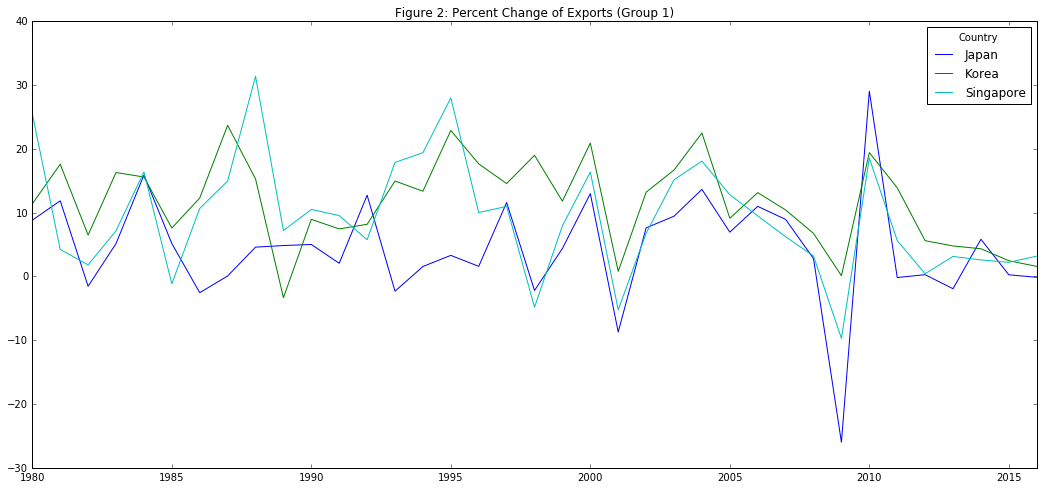

In [20]:
url='https://raw.githubusercontent.com/hjkim1304/databootcampdata/master/weo_data.csv'
df_1=pd.read_csv(url)
df_1=df_1.drop(['Scale','Country/Series-specific Notes','Estimates Start After'],axis=1).head(n=12).set_index('Country')
df_imports=df_1.iloc[[0,2,4,6,8,10]]
df_exports=df_1.iloc[[1,3,5,7,9,11]]


df_exports_group1=df_1.iloc[[1,3,7]]
df_exports_group2=df_1.iloc[[5,9,11]]
df_imports_group1=df_1.iloc[[0,2,6]]
df_imports_group2=df_1.iloc[[4,8,10]]

fig ,ax=plt.subplots(figsize=(18,8))
df_exports_group1.drop(['Subject Descriptor','Units'],axis=1).T.plot(ax=ax,color=['b','g','c'])
ax.set_title("Figure 2: Percent Change of Exports (Group 1)")


In Figure 2, we have plotted 3 time series that plots the Percent Change in the Volume of Exports of three developed Asian countries (Japan, Korea, Singapore).

First, Japan shows lower increase in exports compared to that of Korea and Singapore. This is probably because Japan's economy was already developed before 1990s, while Korea and Singapore were still developing.

Second, after the Asian Financial Crisis in 1997, the three economies begin to show almost identical patterns. This may imply that Korea and Singapor have caught up in terms of economic development and now they share similar economic climate. For example, if Singapore does poorly in terms of exports in one year, it may be reasonable to infer that Japan and Korea may follow the similar path. 

Furthermore, we can infer that since Japan has influence over the world economy, the global financial crisis in 2008 impacted them much harder than other countries in this category, which is why their exports fluctuated more than the exports from Korea and Singapore during the same period.

Now we consider the exports data for Group 2.

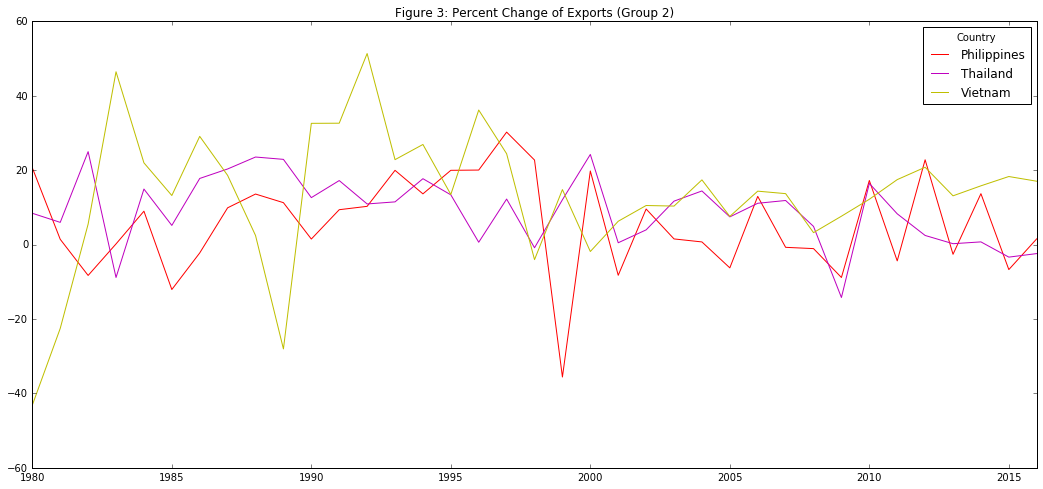

In [21]:
fig ,ax=plt.subplots(figsize=(18,8))
df_exports_group2.drop(['Subject Descriptor','Units'],axis=1).T.plot(ax=ax, color=['r','m','y'])
ax.set_title("Figure 3: Percent Change of Exports (Group 2)")

In Figure 3, first thing to notice is the wild fluctuations of Vietnam before 1995, because they were just beginning to open their economy and noticeable decline of Phillipines during the Asian fianancial crisis in 1997.

There are a few interesting observations about the data. First, their exports were not as negatively affected by the financial crisis in 2008 as the exports of the developed economies. Figure 2 suggests that the 2008 crisis had almost no impact on their exports. Second, overall, Figure 2 exhibits that the exports change less in magnitude than the countries shown in Figure 1. This may be because of the fact that they are less dependent on trade, or the items they exports are not sensitive to the sentimates of the global economies, i.e. basic necessities.

**Based on these findings, we can see that the developed countries in Figure 2 are more heavily dependent on global economic climate while the developing countries in Figure 3 are much less so. It seems that the developed countries are more sensitive to the global demand. **

Now we arrive at another question:

What accounts for the difference in the magnitude of fluctuations between Group 1 and Group 2?
Is it simply because of the difference in the amount of exports? Or are there more qualitative reasons?

In order to exlpore the question, we examine the data for trade percent of GDP for each country.

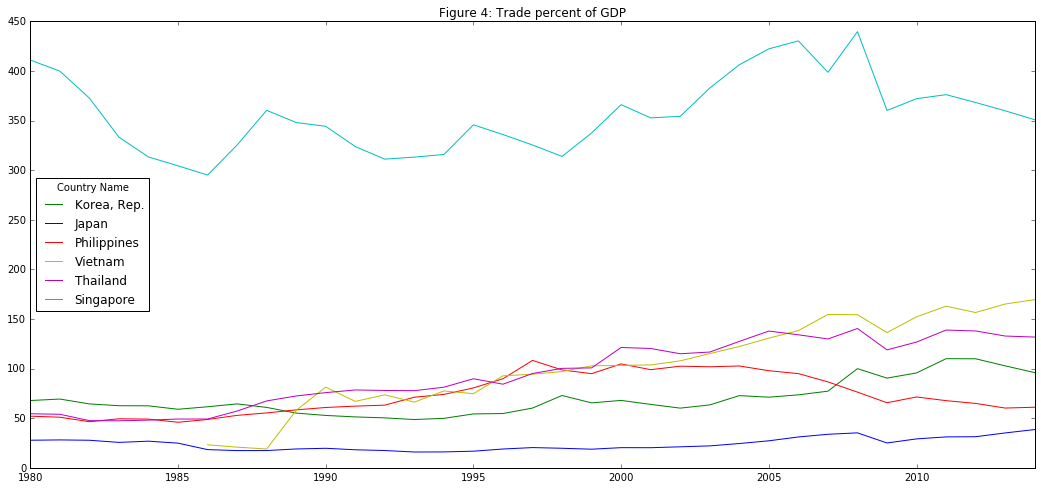

In [22]:
url4='https://raw.githubusercontent.com/hjkim1304/databootcampdata/master/tradepercentoriginal.csv'
df_gdp_trade=pd.read_csv(url4,na_values=['..'])
df_gdp_trade=df_gdp_trade.drop(['Series Name','Series Code','Country Code','2015 [YR2015]'],axis=1).head(n=6).set_index('Country Name')
df_gdp_trade=df_gdp_trade.rename(columns={'1980 [YR1980]':'1980', '1981 [YR1981]':'1981', '1982 [YR1982]':'1982', '1983 [YR1983]':'1983',
       '1984 [YR1984]':'1984', '1985 [YR1985]':'1985', '1986 [YR1986]':'1986', '1987 [YR1987]':'1987',
       '1988 [YR1988]':'1988', '1989 [YR1989]':'1989', '1990 [YR1990]':'1990', '1991 [YR1991]':'1991',
       '1992 [YR1992]':'1992', '1993 [YR1993]':'1993', '1994 [YR1994]':'1994', '1995 [YR1995]':'1995',
       '1996 [YR1996]':'1996', '1997 [YR1997]':'1997', '1998 [YR1998]':'1998', '1999 [YR1999]':'1999',
       '2000 [YR2000]':'2000', '2001 [YR2001]':'2001', '2002 [YR2002]':'2002', '2003 [YR2003]':'2003',
       '2004 [YR2004]':'2004', '2005 [YR2005]':'2005', '2006 [YR2006]':'2006', '2007 [YR2007]':'2007',
       '2008 [YR2008]':'2008', '2009 [YR2009]':'2009', '2010 [YR2010]':'2010', '2011 [YR2011]':'2011',
       '2012 [YR2012]':'2012', '2013 [YR2013]':'2013', '2014 [YR2014]':'2014'})
df_gdp_trade=df_gdp_trade.T

#df_gdp_trade.dtypes
fig,ax=plt.subplots(figsize=(18,8))
df_gdp_trade.plot(ax=ax, color=['g','b','r','y','m','c'])
ax.set_title('Figure 4: Trade percent of GDP')

In Figure 4, we can notice that Singapore has by far the highest trade volume compared to its GDP. That explains how such a small country like Singapore became developed and affluent. Since Singapore has the smallest population among the six countries, their domestic market is very small. Therefore, they had to focus on trade, hence the higest trade percent of GDP by far. Second, Japan has the most advanced economy, but we find it at the bottom. It might seem puzzling, suggesting that exports account little for economic developments.

Japan has the biggest population among the six countries, and therefore it has a very large domestic economy. This might be the reason that the trade percent of GDP is very low for Japan.

Vietnam has the highest trade percent of GDP next to Singapore. Vietnam has quite a large population (around 90 million, third largest among the 6 countries) but its GDP is the lowest. From this fact, we can infer that trade (exports) is not the absolute way to measure or forecast economic growth.  

In fact, Japan's top exports include high value-added items such as integrated circuits and vehicle parts (Japan's proprietary technology). However, Vietnam's top exports included low value-added items (or simply items that need assembly) such as leather footwear, fabric, and telephones. 

Korea has less trade percent of GDP than Vietname and Phillipines, but showed tremendous growth in the past few decades. Korea was among the developing group in the 1980s, but it diverged from the group and eventually caught up with Japan and other developed countries. We were able to find that Korea also has many high value-added exports such as integrated circuits, LCDs, and Cargo Ships. 

## Conclusion

Based on those observations, we conclude that the rate of economic growth cannot solely be accounted by how much exports a country makes. However, it is more about the quality of the items they can create, how much value they can add when they export goods. Low-value-added items tend to be basic necessities, while high-value-items tend to be more specialized and sometimes luxuries. Therefore, countries such as Japan and South Korea were hit hard by the 2008 crisis as consumers around the world significantly reduced their spendings on high-value-added items. However, countries such as Vietnam and Thailand were less influenced by the 2008 crisis because their exports items include more basic necessities, so the global demand did not fluctuate much. In other words, countries that experienced faster growth seem to possess technology that allows them to produce high-value-added items, or education system that equips their citizens with valuable skills. These factors appear to play a very important role in determining whether or not an economy can experience fast growth, and are worth further exploring. 

Sources:
    
[The Observatory of Economic Complexity](http://atlas.media.mit.edu/en/)
: Information for export items, amount, various rankings among countries.

[WorldBank](http://data.worldbank.org/indicator/NE.EXP.GNFS.ZS)
: You can select the periods and countries and export the selected data to Excel file

[Internatioanl Monetary Funds](http://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?sy=1980&ey=2016&sort=country&ds=.&br=1&pr1.x=71&pr1.y=10&c=566%2C576%2C578%2C158%2C542%2C582&s=PPPPC%2CTXG_RPCH&grp=0&a=)
:GDP and Exports Data, 6 countries selected from 1980 to present, can be exported to Excel file